# Repeat Buyers Prediction

## Part 1 - Data Prep, EDA, Feature Engineering

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### Data Preprocessing

In [2]:
df_train = pd.read_csv('data_format1/train_format1.csv')
df_test = pd.read_csv('data_format1/test_format1.csv')
user_info = pd.read_csv('data_format1/user_info_format1.csv')

In [3]:
user_log = pd.read_csv('data_format1/user_log_format1.csv')

In [4]:
print(df_test.shape,df_train.shape)
print(user_info.shape,user_log.shape)

(261477, 3) (260864, 3)
(424170, 3) (54925330, 7)


In [5]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [6]:
user_info.head(10)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0
5,272389,6.0,1.0
6,281071,4.0,0.0
7,139859,7.0,0.0
8,198411,5.0,1.0
9,67037,4.0,1.0


In [7]:
# Fixing NULL values for age_range and gender
user_info['age_range'].replace(0.0,np.nan,inplace=True)
user_info['gender'].replace(2.0,np.nan,inplace=True)
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  329039 non-null  float64
 2   gender     407308 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [8]:
user_info['age_range'].replace(np.nan,-1,inplace=True)
user_info['gender'].replace(np.nan,-1,inplace=True)

### Simple Visualization - User Info

Text(0.5, 1.0, 'Age Distribution')

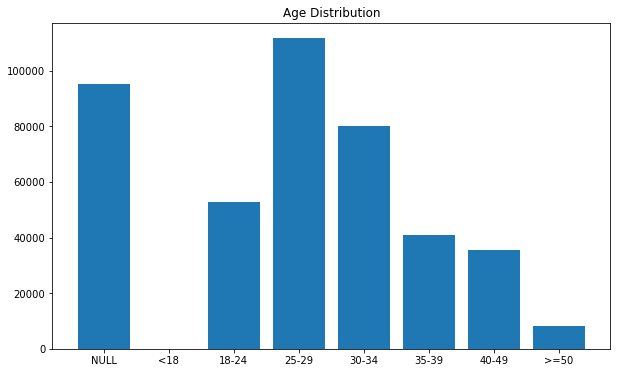

In [9]:
fig = plt.figure(figsize = (10,6))
x = np.array(["NULL", "<18", "18-24", "25-29", "30-34", "35-39", "40-49", ">=50"])
# 1 for <18; 2 for [18,24]; 3 for [25,29]; 4 for [30,34]; 
# 5 for [35,39]; 6 for [40,49]; 7 and 8 for >= 50; 0 and NULL for unknown.

y = np.array([user_info[user_info["age_range"] == -1]["age_range"].count(),
             user_info[user_info["age_range"] == 1]["age_range"].count(),
             user_info[user_info["age_range"] == 2]["age_range"].count(),
             user_info[user_info["age_range"] == 3]["age_range"].count(),
             user_info[user_info["age_range"] == 4]["age_range"].count(), 
             user_info[user_info["age_range"] == 5]["age_range"].count(),
             user_info[user_info["age_range"] == 6]["age_range"].count(),
             user_info[user_info["age_range"] == 7]["age_range"].count() 
              + user_info[user_info["age_range"] == 8]["age_range"].count()])

plt.bar(x,y)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Age Distribution')

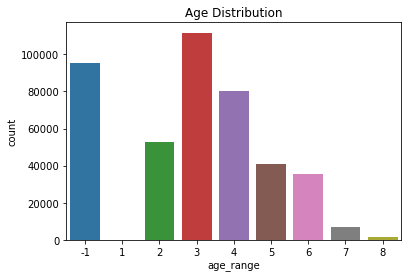

In [10]:
sns.countplot(x = 'age_range', order = [-1,1,2,3,4,5,6,7,8], data = user_info)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Gender Distribution')

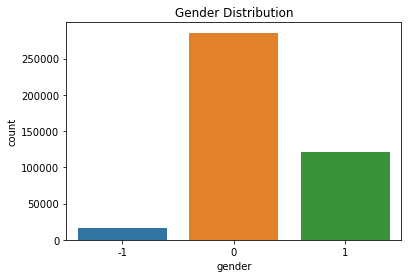

In [11]:
#0:NULL, 1:Female, 2:Male
sns.countplot(x = 'gender', order = [-1,0,1], data = user_info)
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Age/Gender Distribution')

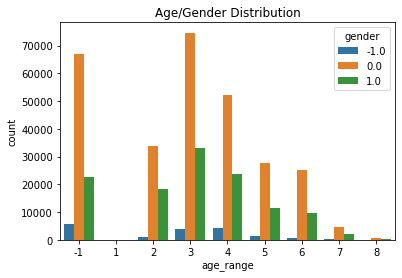

In [12]:
sns.countplot(x = 'age_range', order = [-1,1,2,3,4,5,6,7,8],hue= 'gender',data = user_info)
plt.title('Age/Gender Distribution')

# 1 for <18; 2 for [18,24]; 3 for [25,29]; 4 for [30,34]; 
# 5 for [35,39]; 6 for [40,49]; 7 and 8 for >= 50; 0 and NULL for unknown.

#0:NULL, 1:Female, 2:Male

In [13]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


In [14]:
user_log.isnull().sum(axis=0)

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

In [15]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


### Simple Visualization

In [16]:
df_train.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


<AxesSubplot:>

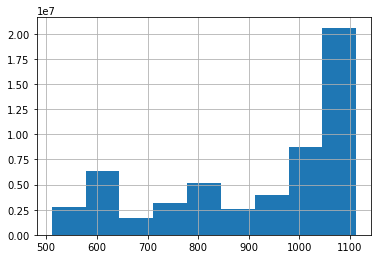

In [18]:
user_log['time_stamp'].hist(bins = 9)

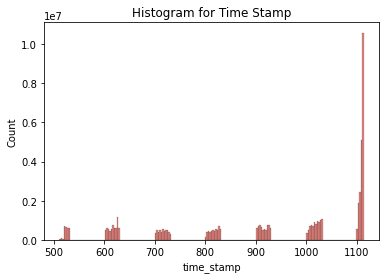

In [19]:
sns.set_palette("hls")
sns.histplot(data=user_log, x="time_stamp",binwidth=3)

plt.title("Histogram for Time Stamp")
plt.show()

November has much more actions compared to rest of the year. Almost all actions throughout the year combined.

Text(0.5, 1.0, 'User Action Type')

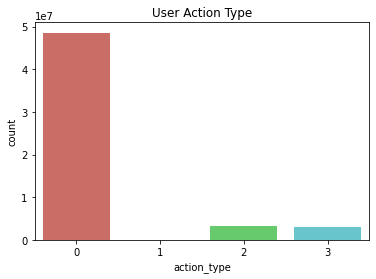

In [21]:
sns.set_palette("hls")
sns.countplot(x = 'action_type', order = [0,1,2,3], data = user_log)
plt.title("User Action Type")

### Feature Engineering

In [22]:
# repeat buyer
df_train[df_train['label'] == 1]

,user_id,merchant_id,label
2,34176,4356,1
7,231552,3828,1
53,306816,1489,1
57,176256,3323,1
59,307584,1340,1
...,...,...,...
260747,208511,2592,1
260793,87935,1964,1
260794,87935,3734,1
260799,350591,4394,1


In [115]:
# action of particular user in particular store
user_log[(user_log['user_id'] == 344766) & (user_log['seller_id'] == 2634)]

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
46982135,344766,254410,1023,2634,6437.0,1111,0
46982147,344766,254410,1023,2634,6437.0,1111,0
46982148,344766,254410,1023,2634,6437.0,1111,2
46982156,344766,254410,1023,2634,6437.0,1111,2
46982157,344766,254410,1023,2634,6437.0,1111,2
46982159,344766,254410,1023,2634,6437.0,1111,3
46982168,344766,254410,1023,2634,6437.0,1111,0
46982170,344766,254410,1023,2634,6437.0,1111,0
46982171,344766,254410,1023,2634,6437.0,1111,0
46982172,344766,254410,1023,2634,6437.0,1111,0


In [116]:
# action of particular user
user_log[user_log['user_id'] == 344766]

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
46982132,344766,344861,1095,1612,7190.0,1111,0
46982133,344766,713695,883,66,2924.0,1111,0
46982134,344766,57239,464,506,7500.0,1111,0
46982135,344766,254410,1023,2634,6437.0,1111,0
46982136,344766,781503,737,1708,2970.0,1111,0
...,...,...,...,...,...,...,...
46982645,344766,329418,1141,167,6019.0,707,0
46982646,344766,76400,1571,1746,5576.0,707,0
46982647,344766,329418,1141,167,6019.0,707,0
46982648,344766,175338,1141,167,6019.0,707,0


In [24]:
df_train.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [25]:
user_info.head()

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [26]:
user_log.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


#### Merge user_info to df_train

In [27]:
df_train = pd.merge(df_train, user_info, on = "user_id", how = "left")
df_train.head()

,user_id,merchant_id,label,age_range,gender
0,34176,3906,0,6.0,0.0
1,34176,121,0,6.0,0.0
2,34176,4356,1,6.0,0.0
3,34176,2217,0,6.0,0.0
4,230784,4818,0,-1.0,0.0


#### Feature Creation -  "total_logs"
- Number of actions by per user for per merchant 

In [28]:
total_logs_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"]]
                                  ).count().reset_index()[["user_id","seller_id","item_id"]]

In [29]:
total_logs_temp.head(10)

,user_id,seller_id,item_id
0,1,471,1
1,1,739,1
2,1,925,4
3,1,1019,14
4,1,1156,1
5,1,2245,5
6,1,4026,5
7,1,4177,1
8,1,4335,1
9,2,420,26


In [30]:
total_logs_temp[total_logs_temp['user_id'] == 34176]

,user_id,seller_id,item_id
1126305,34176,1,8
1126306,34176,121,14
1126307,34176,141,1
1126308,34176,152,1
1126309,34176,158,1
...,...,...,...
1126409,34176,4752,1
1126410,34176,4785,4
1126411,34176,4850,1
1126412,34176,4903,6


In [31]:
total_logs_temp[(total_logs_temp['user_id'] == 34176) & (total_logs_temp['seller_id'] == 4356)]

,user_id,seller_id,item_id
1126404,34176,4356,18


In [32]:
total_logs_temp.rename(columns={"seller_id":"merchant_id","item_id":"total_logs"},inplace=True)
total_logs_temp.head()

,user_id,merchant_id,total_logs
0,1,471,1
1,1,739,1
2,1,925,4
3,1,1019,14
4,1,1156,1


In [33]:
df_train = pd.merge(df_train,total_logs_temp,on=["user_id","merchant_id"],how="left")
df_train.head()

,user_id,merchant_id,label,age_range,gender,total_logs
0,34176,3906,0,6.0,0.0,39
1,34176,121,0,6.0,0.0,14
2,34176,4356,1,6.0,0.0,18
3,34176,2217,0,6.0,0.0,2
4,230784,4818,0,-1.0,0.0,8


#### Create Feature - "unique_item_ids"
- Number of unique items viewed by each user

In [34]:
unique_item_ids_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["item_id"]]
                                       ).count().reset_index()[["user_id","seller_id","item_id"]]

In [35]:
unique_item_ids_temp.head(10)

,user_id,seller_id,item_id
0,1,471,638653
1,1,739,556107
2,1,925,504149
3,1,1019,1110495
4,1,1156,896183
5,1,2245,181459
6,1,2245,452837
7,1,2245,543397
8,1,2245,779078
9,1,4026,112203


In [36]:
unique_item_ids_temp1 = unique_item_ids_temp.groupby([unique_item_ids_temp["user_id"],unique_item_ids_temp["seller_id"]]
                                                    ).count().reset_index()

In [37]:
unique_item_ids_temp1.head(10)

,user_id,seller_id,item_id
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,4
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,15


In [38]:
unique_item_ids_temp1.rename(columns={"seller_id":"merchant_id","item_id":"unique_item_ids"},inplace=True)

In [39]:
unique_item_ids_temp1.head(10)

,user_id,merchant_id,unique_item_ids
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,4
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,15


In [40]:
df_train = pd.merge(df_train,unique_item_ids_temp1,on=["user_id","merchant_id"],how="left")
df_train.head()

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids
0,34176,3906,0,6.0,0.0,39,20
1,34176,121,0,6.0,0.0,14,1
2,34176,4356,1,6.0,0.0,18,2
3,34176,2217,0,6.0,0.0,2,1
4,230784,4818,0,-1.0,0.0,8,1


#### Create Feature - "categories"
- Number of different categories viewed

In [41]:
categories_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["cat_id"]]
                                  ).count().reset_index()[["user_id","seller_id","cat_id"]]

In [42]:
categories_temp.head(20)

,user_id,seller_id,cat_id
0,1,471,389
1,1,739,1252
2,1,925,1023
3,1,1019,992
4,1,1156,1256
5,1,2245,276
6,1,4026,1252
7,1,4177,1252
8,1,4335,389
9,2,420,602


In [43]:
categories_temp1 = categories_temp.groupby([categories_temp["user_id"],categories_temp["seller_id"]]
                                          ).count().reset_index()
categories_temp1.head(10)

,user_id,seller_id,cat_id
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,2


In [44]:
categories_temp1.rename(columns={"seller_id":"merchant_id","cat_id":"categories"},inplace=True)
categories_temp1.head(10)

,user_id,merchant_id,categories
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,1
7,1,4177,1
8,1,4335,1
9,2,420,2


In [45]:
df_train = pd.merge(df_train,categories_temp1,on=["user_id","merchant_id"],how="left")

In [46]:
df_train.head()

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories
0,34176,3906,0,6.0,0.0,39,20,6
1,34176,121,0,6.0,0.0,14,1,1
2,34176,4356,1,6.0,0.0,18,2,1
3,34176,2217,0,6.0,0.0,2,1,1
4,230784,4818,0,-1.0,0.0,8,1,1


#### Feature Creation - "browse days"
- Number of days each user browsed Tmall

In [47]:
browse_days_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],
                                     user_log["time_stamp"]]
                                   ).count().reset_index()[["user_id","seller_id","time_stamp"]]

In [48]:
browse_days_temp.head(10)

,user_id,seller_id,time_stamp
0,1,471,1111
1,1,739,1018
2,1,925,1011
3,1,1019,1111
4,1,1156,1111
5,1,2245,1009
6,1,4026,1018
7,1,4026,1021
8,1,4177,1018
9,1,4335,1111


In [49]:
browse_days_temp1 = browse_days_temp.groupby([browse_days_temp["user_id"],
                                              browse_days_temp["seller_id"]]).count().reset_index()

In [50]:
browse_days_temp1.head(10)

,user_id,seller_id,time_stamp
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,2
7,1,4177,1
8,1,4335,1
9,2,420,1


In [51]:
browse_days_temp1.rename(columns={"seller_id":"merchant_id","time_stamp":"browse_days"},inplace=True)
browse_days_temp1.head(10)

,user_id,merchant_id,browse_days
0,1,471,1
1,1,739,1
2,1,925,1
3,1,1019,1
4,1,1156,1
5,1,2245,1
6,1,4026,2
7,1,4177,1
8,1,4335,1
9,2,420,1


In [52]:
df_train = pd.merge(df_train,browse_days_temp1,on=["user_id","merchant_id"],how="left")

In [53]:
df_train.head(10)

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories,browse_days
0,34176,3906,0,6.0,0.0,39,20,6,9
1,34176,121,0,6.0,0.0,14,1,1,3
2,34176,4356,1,6.0,0.0,18,2,1,2
3,34176,2217,0,6.0,0.0,2,1,1,1
4,230784,4818,0,-1.0,0.0,8,1,1,3
5,362112,2618,0,4.0,1.0,1,1,1,1
6,34944,2051,0,5.0,0.0,3,2,1,1
7,231552,3828,1,5.0,0.0,83,48,15,3
8,231552,2124,0,5.0,0.0,7,4,1,1
9,232320,1168,0,4.0,1.0,4,1,1,2


#### Feature Creation - "double 11 days"
- is_db11 / not_db11, whether browse day is exactly on 11.11
- db11_days / non_db11_days, browse days were within the 11.11 promotion period (Nov 1st - Nov 11th)

In [54]:
db11_days_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],
                                     user_log["time_stamp"]]
                                   ).count().reset_index()[["user_id","seller_id","time_stamp"]]

In [55]:
db11_days_temp.head(10)

,user_id,seller_id,time_stamp
0,1,471,1111
1,1,739,1018
2,1,925,1011
3,1,1019,1111
4,1,1156,1111
5,1,2245,1009
6,1,4026,1018
7,1,4026,1021
8,1,4177,1018
9,1,4335,1111


In [56]:
db11_days_temp[(db11_days_temp["time_stamp"] <= 1111)]

,user_id,seller_id,time_stamp
0,1,471,1111
1,1,739,1018
2,1,925,1011
3,1,1019,1111
4,1,1156,1111
...,...,...,...
19367010,424170,4268,1106
19367011,424170,4268,1107
19367012,424170,4268,1108
19367013,424170,4268,1111


In [57]:
db11_days_temp["is_db11"] = np.where((db11_days_temp["time_stamp"]==1111),
                                       1, 0)

In [58]:
db11_days_temp["not_db11"] = np.where((db11_days_temp["time_stamp"] != 1111),
                                       1, 0)

In [59]:
db11_days_temp["db11_days"] = np.where((db11_days_temp["time_stamp"]>=1101) & (db11_days_temp["time_stamp"]<=1111),
                                       1, 0)

In [60]:
db11_days_temp["non_db11_days"] = np.where((db11_days_temp["time_stamp"]<1101) | (db11_days_temp["time_stamp"]>1111),
                                       1, 0)

In [61]:
db11_days_temp.head(10)

,user_id,seller_id,time_stamp,is_db11,not_db11,db11_days,non_db11_days
0,1,471,1111,1,0,1,0
1,1,739,1018,0,1,0,1
2,1,925,1011,0,1,0,1
3,1,1019,1111,1,0,1,0
4,1,1156,1111,1,0,1,0
5,1,2245,1009,0,1,0,1
6,1,4026,1018,0,1,0,1
7,1,4026,1021,0,1,0,1
8,1,4177,1018,0,1,0,1
9,1,4335,1111,1,0,1,0


In [62]:
db11_days_temp[(db11_days_temp['user_id'] == 34176) & (db11_days_temp['seller_id'] == 3906)]

,user_id,seller_id,time_stamp,is_db11,not_db11,db11_days,non_db11_days
1550914,34176,3906,1020,0,1,0,1
1550915,34176,3906,1021,0,1,0,1
1550916,34176,3906,1027,0,1,0,1
1550917,34176,3906,1029,0,1,0,1
1550918,34176,3906,1031,0,1,0,1
1550919,34176,3906,1107,0,1,1,0
1550920,34176,3906,1108,0,1,1,0
1550921,34176,3906,1110,0,1,1,0
1550922,34176,3906,1111,1,0,1,0


In [63]:
db11_days_temp = db11_days_temp.drop(["time_stamp"], axis=1)

In [65]:
db11_days_temp1 = db11_days_temp.groupby([db11_days_temp["user_id"],
                                              db11_days_temp["seller_id"]]).sum().reset_index()
db11_days_temp1.head(10)

,user_id,seller_id,is_db11,not_db11,db11_days,non_db11_days
0,1,471,1,0,1,0
1,1,739,0,1,0,1
2,1,925,0,1,0,1
3,1,1019,1,0,1,0
4,1,1156,1,0,1,0
5,1,2245,0,1,0,1
6,1,4026,0,2,0,2
7,1,4177,0,1,0,1
8,1,4335,1,0,1,0
9,2,420,0,1,0,1


In [66]:
db11_days_temp1.rename(columns={"seller_id":"merchant_id"},inplace=True)
db11_days_temp1.head(10)

,user_id,merchant_id,is_db11,not_db11,db11_days,non_db11_days
0,1,471,1,0,1,0
1,1,739,0,1,0,1
2,1,925,0,1,0,1
3,1,1019,1,0,1,0
4,1,1156,1,0,1,0
5,1,2245,0,1,0,1
6,1,4026,0,2,0,2
7,1,4177,0,1,0,1
8,1,4335,1,0,1,0
9,2,420,0,1,0,1


In [67]:
df_train = pd.merge(df_train,db11_days_temp1,on=["user_id","merchant_id"],how="left")

In [68]:
df_train.head()

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories,browse_days,is_db11,not_db11,db11_days,non_db11_days
0,34176,3906,0,6.0,0.0,39,20,6,9,1,8,4,5
1,34176,121,0,6.0,0.0,14,1,1,3,1,2,3,0
2,34176,4356,1,6.0,0.0,18,2,1,2,1,1,2,0
3,34176,2217,0,6.0,0.0,2,1,1,1,1,0,1,0
4,230784,4818,0,-1.0,0.0,8,1,1,3,1,2,3,0


#### Feature Creation - "one_clicks", "shopping_carts", "purchase_times", "favourite_times"

In [69]:
one_clicks_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],
                                    user_log["action_type"]]).count().reset_index()[["user_id","seller_id",
                                                                                     "action_type","item_id"]]

In [70]:
one_clicks_temp.head(10)

,user_id,seller_id,action_type,item_id
0,1,471,0,1
1,1,739,0,1
2,1,925,0,3
3,1,925,2,1
4,1,1019,0,10
5,1,1019,2,4
6,1,1156,0,1
7,1,2245,0,5
8,1,4026,0,4
9,1,4026,2,1


In [71]:
one_clicks_temp.rename(columns={"seller_id":"merchant_id","item_id":"times"},inplace=True)

In [72]:
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times
0,1,471,0,1
1,1,739,0,1
2,1,925,0,3
3,1,925,2,1
4,1,1019,0,10
5,1,1019,2,4
6,1,1156,0,1
7,1,2245,0,5
8,1,4026,0,4
9,1,4026,2,1


In [73]:
one_clicks_temp["one_clicks"] = one_clicks_temp["action_type"] == 0

In [74]:
one_clicks_temp["one_clicks"] = one_clicks_temp["one_clicks"] * one_clicks_temp["times"]

In [75]:
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks
0,1,471,0,1,1
1,1,739,0,1,1
2,1,925,0,3,3
3,1,925,2,1,0
4,1,1019,0,10,10
5,1,1019,2,4,0
6,1,1156,0,1,1
7,1,2245,0,5,5
8,1,4026,0,4,4
9,1,4026,2,1,0


In [76]:
one_clicks_temp["shopping_carts"] = one_clicks_temp["action_type"] == 1

In [77]:
one_clicks_temp["shopping_carts"] = one_clicks_temp["shopping_carts"] * one_clicks_temp["times"]

In [78]:
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts
0,1,471,0,1,1,0
1,1,739,0,1,1,0
2,1,925,0,3,3,0
3,1,925,2,1,0,0
4,1,1019,0,10,10,0
5,1,1019,2,4,0,0
6,1,1156,0,1,1,0
7,1,2245,0,5,5,0
8,1,4026,0,4,4,0
9,1,4026,2,1,0,0


In [79]:
one_clicks_temp["purchase_times"] = one_clicks_temp["action_type"] == 2

In [80]:
one_clicks_temp["purchase_times"] = one_clicks_temp["purchase_times"] * one_clicks_temp["times"]

In [81]:
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times
0,1,471,0,1,1,0,0
1,1,739,0,1,1,0,0
2,1,925,0,3,3,0,0
3,1,925,2,1,0,0,1
4,1,1019,0,10,10,0,0
5,1,1019,2,4,0,0,4
6,1,1156,0,1,1,0,0
7,1,2245,0,5,5,0,0
8,1,4026,0,4,4,0,0
9,1,4026,2,1,0,0,1


In [82]:
one_clicks_temp["favourite_times"] = one_clicks_temp["action_type"] == 3

In [83]:
one_clicks_temp["favourite_times"] = one_clicks_temp["favourite_times"] * one_clicks_temp["times"]

In [84]:
one_clicks_temp.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times,favourite_times
0,1,471,0,1,1,0,0,0
1,1,739,0,1,1,0,0,0
2,1,925,0,3,3,0,0,0
3,1,925,2,1,0,0,1,0
4,1,1019,0,10,10,0,0,0
5,1,1019,2,4,0,0,4,0
6,1,1156,0,1,1,0,0,0
7,1,2245,0,5,5,0,0,0
8,1,4026,0,4,4,0,0,0
9,1,4026,2,1,0,0,1,0


In [85]:
four_features = one_clicks_temp.groupby([one_clicks_temp["user_id"],
                                         one_clicks_temp["merchant_id"]]).sum().reset_index()

In [86]:
four_features.head(10)

,user_id,merchant_id,action_type,times,one_clicks,shopping_carts,purchase_times,favourite_times
0,1,471,0,1,1,0,0,0
1,1,739,0,1,1,0,0,0
2,1,925,2,4,3,0,1,0
3,1,1019,2,14,10,0,4,0
4,1,1156,0,1,1,0,0,0
5,1,2245,0,5,5,0,0,0
6,1,4026,2,5,4,0,1,0
7,1,4177,0,1,1,0,0,0
8,1,4335,0,1,1,0,0,0
9,2,420,2,26,23,0,3,0


In [87]:
four_features = four_features.drop(["action_type","times"], axis=1)

In [88]:
df_train = pd.merge(df_train,four_features,on=["user_id","merchant_id"],how="left")

In [89]:
df_train.head(10)

,user_id,merchant_id,label,age_range,gender,total_logs,unique_item_ids,categories,browse_days,is_db11,not_db11,db11_days,non_db11_days,one_clicks,shopping_carts,purchase_times,favourite_times
0,34176,3906,0,6.0,0.0,39,20,6,9,1,8,4,5,36,0,1,2
1,34176,121,0,6.0,0.0,14,1,1,3,1,2,3,0,13,0,1,0
2,34176,4356,1,6.0,0.0,18,2,1,2,1,1,2,0,12,0,6,0
3,34176,2217,0,6.0,0.0,2,1,1,1,1,0,1,0,1,0,1,0
4,230784,4818,0,-1.0,0.0,8,1,1,3,1,2,3,0,7,0,1,0
5,362112,2618,0,4.0,1.0,1,1,1,1,1,0,1,0,0,0,1,0
6,34944,2051,0,5.0,0.0,3,2,1,1,1,0,1,0,2,0,1,0
7,231552,3828,1,5.0,0.0,83,48,15,3,1,2,3,0,78,0,5,0
8,231552,2124,0,5.0,0.0,7,4,1,1,1,0,1,0,6,0,1,0
9,232320,1168,0,4.0,1.0,4,1,1,2,1,1,2,0,2,0,1,1


### Treating null values

In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260864 entries, 0 to 260863
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          260864 non-null  int64  
 1   merchant_id      260864 non-null  int64  
 2   label            260864 non-null  int64  
 3   age_range        260864 non-null  float64
 4   gender           260864 non-null  float64
 5   total_logs       260864 non-null  int64  
 6   unique_item_ids  260864 non-null  int64  
 7   categories       260864 non-null  int64  
 8   browse_days      260864 non-null  int64  
 9   is_db11          260864 non-null  int64  
 10  not_db11         260864 non-null  int64  
 11  db11_days        260864 non-null  int64  
 12  non_db11_days    260864 non-null  int64  
 13  one_clicks       260864 non-null  int64  
 14  shopping_carts   260864 non-null  int64  
 15  purchase_times   260864 non-null  int64  
 16  favourite_times  260864 non-null  int6

In [91]:
df_train.isnull().sum(axis=0)

user_id            0
merchant_id        0
label              0
age_range          0
gender             0
total_logs         0
unique_item_ids    0
categories         0
browse_days        0
is_db11            0
not_db11           0
db11_days          0
non_db11_days      0
one_clicks         0
shopping_carts     0
purchase_times     0
favourite_times    0
dtype: int64

In [92]:
# df_train = df_train.fillna(method='ffill') #forward fill

### Export csv with additional features

In [93]:
df_train.to_csv("user_data_w_features.csv")

### Feature Visualization

Text(0.5, 1.0, 'Train Data User Age Range & Gender Distribution')

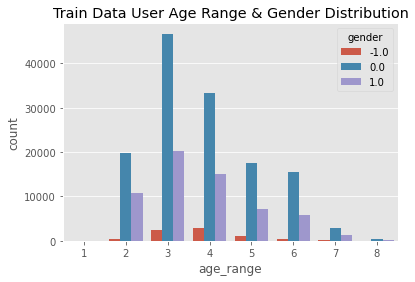

In [94]:
plt.style.use('ggplot')
sns.countplot(x = 'age_range', order = [1,2,3,4,5,6,7,8],hue= 'gender',data = df_train)
plt.title('Train Data User Age Range & Gender Distribution')

['user_id', 'merchant_id', 'label', 'age_range', 'gender', 'total_logs', 'unique_item_ids', 'categories', 'browse_days', 'is_db11', 'not_db11', 'db11_days', 'non_db11_days', 'one_clicks', 'shopping_carts', 'purchase_times', 'favourite_times']


Text(0.5, 1.0, 'Total Logs X User Count')

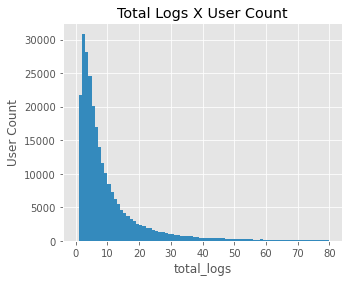

In [95]:
colnm = df_train.columns.tolist()
print(colnm)
plt.figure(figsize = (5, 4))
color = sns.color_palette()

df_train[colnm[5]].hist(range=[0,80],bins = 80,color = color[1])
plt.xlabel(colnm[5],fontsize = 12)
plt.ylabel('User Count')
plt.title("Total Logs X User Count")

Text(0.5, 1.0, 'Unique Item ID x User Count')

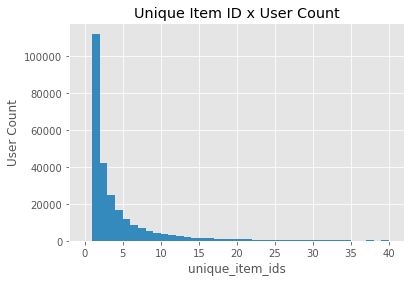

In [96]:
df_train[colnm[6]].hist(range=[0,40],bins = 40,color = color[1])
plt.xlabel(colnm[6],fontsize = 12)
plt.ylabel('User Count')
plt.title("Unique Item ID x User Count")

Text(0.5, 1.0, 'User Count x Category Distribution')

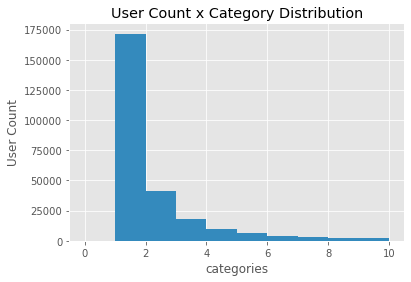

In [97]:
df_train[colnm[7]].hist(range=[0,10],bins = 10,color = color[1])
plt.xlabel(colnm[7],fontsize = 12)
plt.ylabel("User Count")
plt.title("User Count x Category Distribution")

Text(0.5, 1.0, 'User Count x Browse Days')

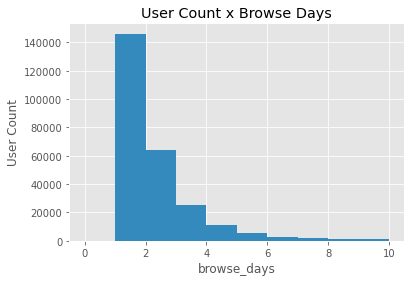

In [98]:
df_train[colnm[8]].hist(range=[0,10],bins = 10,color = color[1])
plt.xlabel(colnm[8],fontsize = 12)
plt.ylabel("User Count")
plt.title("User Count x Browse Days")

Text(0.5, 1.0, 'User Count x One Click')

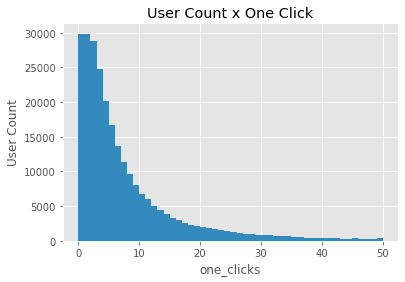

In [99]:
df_train[colnm[13]].hist(range=[0,50],bins = 50,color = color[1])
plt.xlabel(colnm[13],fontsize = 12)
plt.ylabel('User Count')
plt.title("User Count x One Click")

Text(0, 0.5, 'User Count')

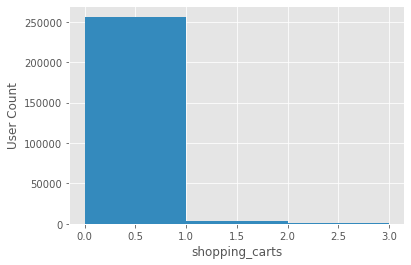

In [100]:
df_train[colnm[14]].hist(range=[0,3],bins = 3,color = color[1])
plt.xlabel(colnm[14],fontsize = 12)
plt.ylabel('User Count')

Text(0, 0.5, 'User Count')

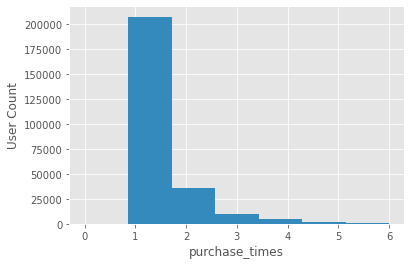

In [101]:
df_train[colnm[15]].hist(range=[0,6],bins = 7,color = color[1])
plt.xlabel(colnm[15],fontsize = 12)
plt.ylabel("User Count")

Text(0, 0.5, 'User Count')

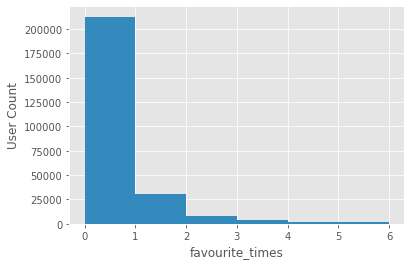

In [102]:
df_train[colnm[16]].hist(range=[0,6],bins = 6,color = color[1])
plt.xlabel(colnm[16],fontsize = 12)
plt.ylabel("User Count")

/var/folders/71/1sps22qj5w32ftm713lpq5200000gn/T/ipykernel_26508/3948229112.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(mcorr, dtype=np.bool)


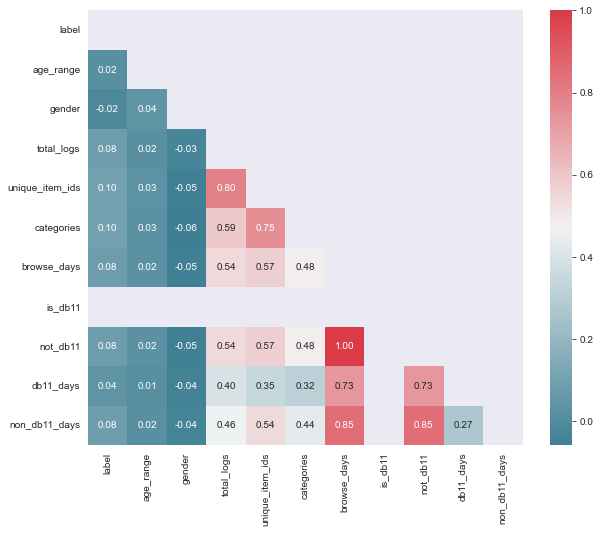

In [103]:
sns.set_style("dark")

plt.figure(figsize = (10,8))
colnm = df_train.columns.tolist()[2:13]
mcorr = df_train[colnm].corr()
# np.zero_like的意思就是生成一个和你所给数组a相同shape的全0数组。
mask = np.zeros_like(mcorr, dtype=np.bool)
# np.triu_indices_from()返回方阵的上三角矩阵的索引
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True,fmt='0.2f')
# 相关性好像不大，可是日志里确实也没啥可以用的其他特征了啊

### Test Data - Feature Engineering

In [104]:
df_test = pd.merge(df_test,user_info,on="user_id",how="left")

In [105]:
df_test = pd.merge(df_test,total_logs_temp,on=["user_id","merchant_id"],how="left")

In [106]:
df_test = pd.merge(df_test,unique_item_ids_temp1,on=["user_id","merchant_id"],how="left")

In [107]:
df_test = pd.merge(df_test,categories_temp1,on=["user_id","merchant_id"],how="left")

In [108]:
df_test = pd.merge(df_test,browse_days_temp1,on=["user_id","merchant_id"],how="left")

In [109]:
df_test = pd.merge(df_test,db11_days_temp1,on=["user_id","merchant_id"],how="left")

In [110]:
df_test = pd.merge(df_test,four_features,on=["user_id","merchant_id"],how="left")

In [111]:
df_test.isnull().sum(axis=0)

user_id                 0
merchant_id             0
prob               261477
age_range               0
gender                  0
total_logs              0
unique_item_ids         0
categories              0
browse_days             0
is_db11                 0
not_db11                0
db11_days               0
non_db11_days           0
one_clicks              0
shopping_carts          0
purchase_times          0
favourite_times         0
dtype: int64

In [112]:
df_test = df_test.fillna(method='bfill')
# df_test = df_test.fillna(method='ffill')
# 缺失值向后填充

In [ ]:
df_test.isnull().sum(axis=0)

In [113]:
df_test.head(10)

,user_id,merchant_id,prob,age_range,gender,total_logs,unique_item_ids,categories,browse_days,is_db11,not_db11,db11_days,non_db11_days,one_clicks,shopping_carts,purchase_times,favourite_times
0,163968,4605,NaN,-1.0,0.0,2,1,1,1,1,0,1,0,1,0,1,0
1,360576,1581,NaN,2.0,-1.0,10,9,4,1,1,0,1,0,5,0,5,0
2,98688,1964,NaN,6.0,0.0,6,1,1,1,1,0,1,0,5,0,1,0
3,98688,3645,NaN,6.0,0.0,11,1,1,1,1,0,1,0,10,0,1,0
4,295296,3361,NaN,2.0,1.0,50,8,4,5,1,4,5,0,47,0,1,2
5,33408,98,NaN,2.0,0.0,11,2,1,4,1,3,3,1,9,0,1,1
6,230016,1742,NaN,5.0,1.0,13,6,1,1,1,0,1,0,11,0,2,0
7,164736,598,NaN,3.0,1.0,2,1,1,1,1,0,1,0,1,0,1,0
8,164736,1963,NaN,3.0,1.0,3,2,1,1,1,0,1,0,2,0,1,0
9,164736,2634,NaN,3.0,1.0,7,4,3,1,1,0,1,0,6,0,1,0


In [114]:
df_test.to_csv("df_test_w_features.csv")